# Exploratory Data Analysis

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load the Data

In [103]:
hr_df = pd.read_csv('../data/final_clean_hr.csv')
baseballs_df = pd.read_csv('../data/final_mlb_baseballs.csv')
batters_df = pd.read_csv('../data/final_clean_player_info.csv')

In [104]:
hr_df.drop('Unnamed: 0', axis=1, inplace=True)
baseballs_df.drop('Unnamed: 0', axis=1, inplace=True)
batters_df.drop('Unnamed: 0', axis=1, inplace=True)

In [105]:
hr_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y
0,CH,2017-06-10,84.5,-3.4020,6.4696,Aaron Judge,592450,501957,4.0,R,...,-14.0814,3.8260,1.6672,382.0,121.1,24.626,84.120,1682.0,6.342,54.1561
1,FF,2017-04-28,97.1,-2.8091,5.9279,Aaron Judge,592450,592332,5.0,R,...,-11.0144,3.9900,1.8400,435.0,119.4,16.541,96.019,2335.0,6.043,54.4549
2,CU,2015-06-23,86.7,-1.5647,5.3406,Giancarlo Stanton,519317,593372,7.0,R,...,-33.2860,3.7900,1.7200,479.0,119.2,21.970,84.343,2145.0,5.035,55.4629
3,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,8.0,L,...,-34.1660,3.6318,1.6020,467.0,118.7,22.736,88.690,2173.0,5.433,55.0652
4,SL,2017-06-11,84.7,-1.9795,5.6860,Aaron Judge,592450,548337,5.0,R,...,-24.6262,3.8264,1.6676,495.0,118.6,28.419,84.757,2183.0,6.153,54.3442


In [106]:
batters_df.head()

,batter_id,height,weight,age
0,592450,79,282,26
1,519317,78,245,28
2,471865,73,220,32
3,443558,74,230,38
4,121347,75,230,43


#### Merge into one Dataframe

In [107]:
final_df = pd.merge(hr_df, batters_df, how='left', left_on='batter', right_on='batter_id')

In [108]:
final_df[final_df['batter_id'].isnull()]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,batter_id,height,weight,age


In [109]:
baseballs_df.columns

Index(['weight_(oz)', 'circumference_(in)', 'avg_seam_height', 'avg_ccor',
       'avg_ds', 'year'],
      dtype='object')

In [110]:
final_df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'zone', 'p_throws',
       'bb_type', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc',
       'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate',
       'release_extension', 'release_pos_y', 'batter_id', 'height', 'weight',
       'age'],
      dtype='object')

In [111]:
final_df = pd.merge(final_df, baseballs_df, how='left', left_on='game_year', right_on='year')

In [112]:
final_df.isnull().sum().sum()

0

In [113]:
final_df.drop_duplicates(inplace=True)

In [114]:
final_df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'zone', 'p_throws',
       'bb_type', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc',
       'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate',
       'release_extension', 'release_pos_y', 'batter_id', 'height', 'weight',
       'age', 'weight_(oz)', 'circumference_(in)', 'avg_seam_height',
       'avg_ccor', 'avg_ds', 'year'],
      dtype='object')

#### Final Dataframe Updates

With all of my data now merged into one frame I wan to make some final changes:
- Drop Columns:
    - **batter**  : This column is the batter id which I used to the merged the dataframes. I already have the batter names so I will work with that column moving forward
    - **pitcher** : This column is the pitcher id. I am focused on the batter specifically and I also have all of the specific statistics about each of the pitches thrown so this is not needed
    - **game_date** : I have the game year (or season) to analyze and will not need game date
    - **batter_id** : This column was used to merge the batters personal stats in with the home run data and was added through that process and is not needed
    - **year** : This columns was used to merge the baseball stats in with the home run data and was added through that process and is not needed

In [115]:
col = [
    'batter',
    'pitcher',
    'game_date',
    'batter_id',
    'year'
]
final_df.drop(col, axis=1, inplace=True)

#### Save the data

In [116]:
final_df.to_csv('../data/final_for_preprocessing.csv')

### Explore the data

Final features (Data Dictionary):
- **Pitch Features**
    - `pitch_type`: The type of pitch that was thrown and hit for a home run
        - `CH : Changeup`
        - `CU : Curveball`
        - `EP : Eephus`
        - `FC : Cut Fastball (Cutter)`
        - `FF : Four-seam Fastball`
        - `FO : Pitch Out`
        - `FS : Sinking Fastball / Split-Fingered (Splitter)`
        - `FT : Two-seam Fastball`
        - `KC : Knuckle-curve`
        - `KN : Knuckleball`
        - `SC : Screwball`
        - `SI : Sinker`
        - `SL : Slider`
    - `p_throws`: the strong hand in which the pitcher threw the pitch
    - `pfx_x`: the horizontal movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement. This parameter is measured at y=40 feet regardless of the y0 value.
    - `pfx_z`: the vertical movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement. This parameter is measured at y=40 feet regardless of the y0 value.
    - `vx0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `vy0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `vz0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `ax`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `ay`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `az`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `effective_speed`: the (actual) speed of the pitch upon the ball crossing home plate
    - `release_speed`: the (perceived) speed of the pitch upon release from the pitcher
    - `release_spin_rate`: how much spin, in revolutions per minute, a pitch was thrown with upon release.
    - `release_extension`: how far off the mound, in feet, a pitcher releases the pitch.
    - `release_pos_y`: the release coordinates in three dimensions, measure at the initial release point.
    - `release_pos_x`: the release coordinates in three dimensions, measure at the initial release point.
    - `release_pos_z`: the release coordinates in three dimensions, measure at the initial release point.
- **MLB Features**
    - `game_year`: the season the home run hit occurred (2015, 2016 and 2017). 
    - `weight_(oz)`: the weight of the baseballs in oz from each season (2015, 2016 and 2017).
    - `circumference_(in)`: the circumference of the baseballs in inches from each season (2015, 2016 and 2017).
    - `avg_seam_height`: seam height was defined as the average radial distance from the seam to the ear, 3 mm left and right of the seam. 
    - `avg_ccor`: cylindrical coefficient of restitution (ccor) is the measurement of the "bounciness" of the baseball and is the core ingredient of "the pill" the middle rubber of the baseball.
    - `avg_ds`: a measure of a ball's hardness. Its measurement is conducted to represent bat-ball impact forces.
- **Batter Features**
    - `player_name`: the name of the player that hit the home run
    - `height`: the height in inches of the player that hit the home run
    - `weight`: the weight in lbs of the player that hit the home run
    - `age`: the age of the player that hit the home run
    - `hit_distance_sc`: the distance the ball traveled from home plate
    - `launch_speed`: **(Target Variable)** aka exit velocity, measures the speed (mph) of the baseball as it comes off the bat, immediately after a batter makes contact.
    - `launch_angle`: how high, in degrees, a ball was hit by a batter.
    - `bb_type`: the type of hit that came off the bat (fly ball or line drive) for a home run.
    - `sz_top`: the distance in feet from the ground to the top of the current batter’s rulebook strike zone as measured from the video by the PITCHf/x operator. The operator sets a line at the batter’s belt as he settles into the hitting position, and the PITCHf/x software adds four inches up for the top of the zone
    - `sz_bottom`: the distance in feet from the ground to the bottom of the current batter’s rulebook strike zone. The PITCHf/x operator sets a line at the hollow of the knee for the bottom of the zone.
    - `zone`: the location of the pitch as is crossed home plate according to the mapped areas of the batters zone box (1 - 14).
    - `plate_x`: strike zone coordinate x

In [117]:
final_df.columns

Index(['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z',
       'player_name', 'zone', 'p_throws', 'bb_type', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'height', 'weight', 'age', 'weight_(oz)',
       'circumference_(in)', 'avg_seam_height', 'avg_ccor', 'avg_ds'],
      dtype='object')

### Visualizing the Data

Lets get a sense for the distributions of two of main features within the data.
- Launch Speed
- Launch Angle

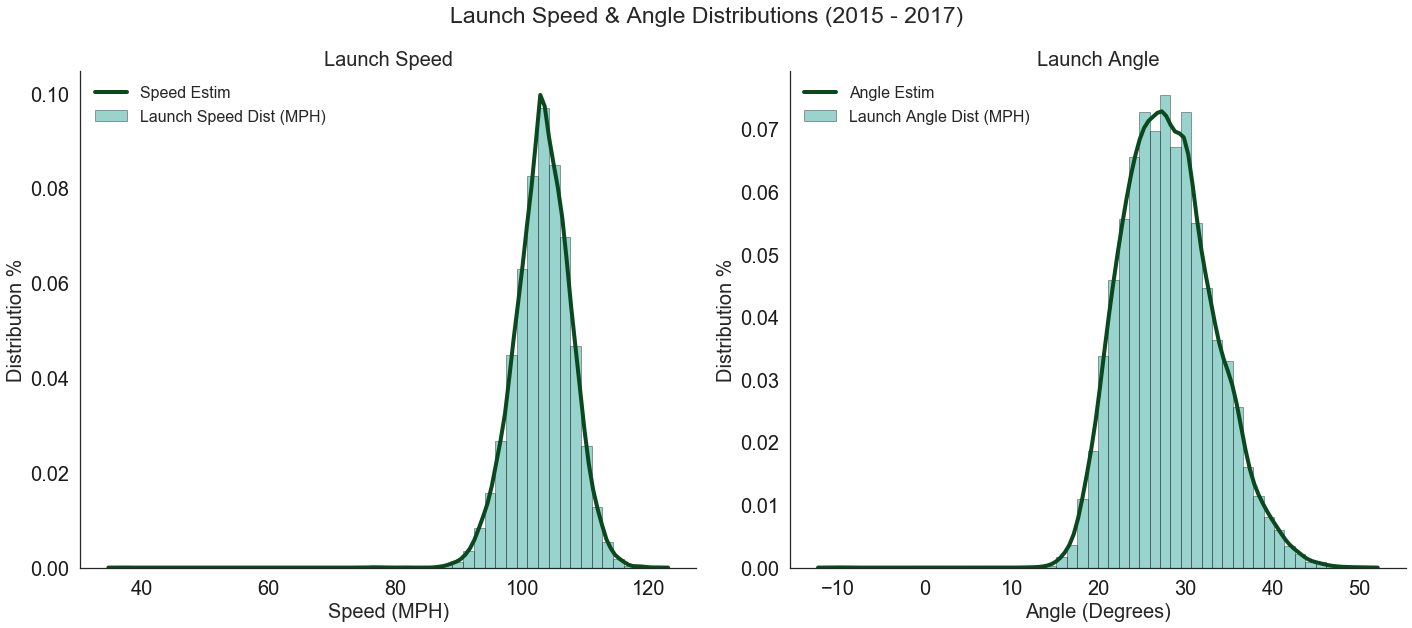

In [185]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,9))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

fig.suptitle('Launch Speed & Angle Distributions (2015 - 2017)')
a = sns.distplot(final_df['launch_speed'], 
                 color = '#029386', 
                 kde_kws={"color":"#0a481e","lw":4,"label":"Speed Estim","alpha":1},
                 hist_kws=dict(edgecolor="k", linewidth=1),
                 norm_hist=False, 
                 ax=axes[0], 
                 label='Launch Speed Dist (MPH)')
b = sns.distplot(final_df['launch_angle'], 
                 color = '#029386', 
                 kde_kws={"color":"#0a481e","lw":4,"label":"Angle Estim","alpha":1},
                 hist_kws=dict(edgecolor="k", linewidth=1),
                 norm_hist=False, 
                 ax=axes[1], 
                 label = 'Launch Angle Dist (MPH)')

axes[0].set_xlabel('Speed (MPH)', fontsize=20)
axes[0].set_ylabel('Distribution %', fontsize=20)
axes[0].set_title('Launch Speed', fontsize=20)
axes[1].set_xlabel('Angle (Degrees)', fontsize=20)
axes[1].set_ylabel('Distribution %', fontsize=20)
axes[1].set_title('Launch Angle', fontsize=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_angle_speed_all')

#### Review by Year

In [191]:
final_df.groupby('game_year').mean()[['launch_angle', 'launch_speed']].T

game_year,2015,2016,2017
launch_angle,27.844097,28.077976,28.077689
launch_speed,103.187495,103.359321,103.156672


In [196]:
launch_speed17 = final_df[final_df['game_year'] == 2017][['launch_speed']]
launch_speed16 = final_df[final_df['game_year'] == 2016][['launch_speed']]
launch_speed15 = final_df[final_df['game_year'] == 2015][['launch_speed']]

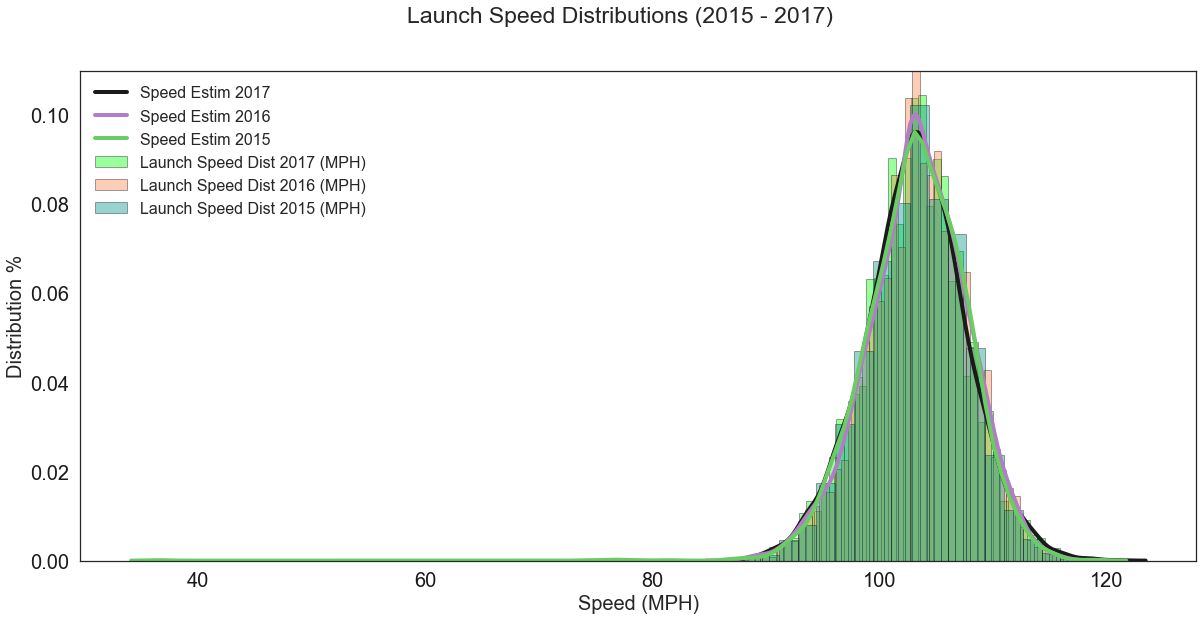

In [206]:
plt.figure(figsize=(20,9))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

plt.suptitle('Launch Speed Distributions (2015 - 2017)')
a = sns.distplot(launch_speed17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"Speed Estim 2017","alpha":1},
                 hist_kws=dict(edgecolor="k", linewidth=1),
                 norm_hist=False,
                 label='Launch Speed Dist 2017 (MPH)')
b = sns.distplot(launch_speed16, 
                 color = '#fc824a', 
                 kde_kws={"color":"m","lw":4,"label":"Speed Estim 2016","alpha":1},
                 hist_kws=dict(edgecolor="k", linewidth=1),
                 norm_hist=False,
                 label = 'Launch Speed Dist 2016 (MPH)')
c = sns.distplot(launch_speed15, 
                 color = '#029386', 
                 kde_kws={"color":"g","lw":4,"label":"Speed Estim 2015","alpha":1},
                 hist_kws=dict(edgecolor="k", linewidth=1),
                 norm_hist=False,
                 label = 'Launch Speed Dist 2015 (MPH)')


plt.xlabel('Speed (MPH)', fontsize=20)
plt.ylabel('Distribution %', fontsize=20)
#sns.set_title('Launch Speed', fontsize=20)


a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")
c.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

# fig.savefig('../plots/subplots_angle_speed_all')

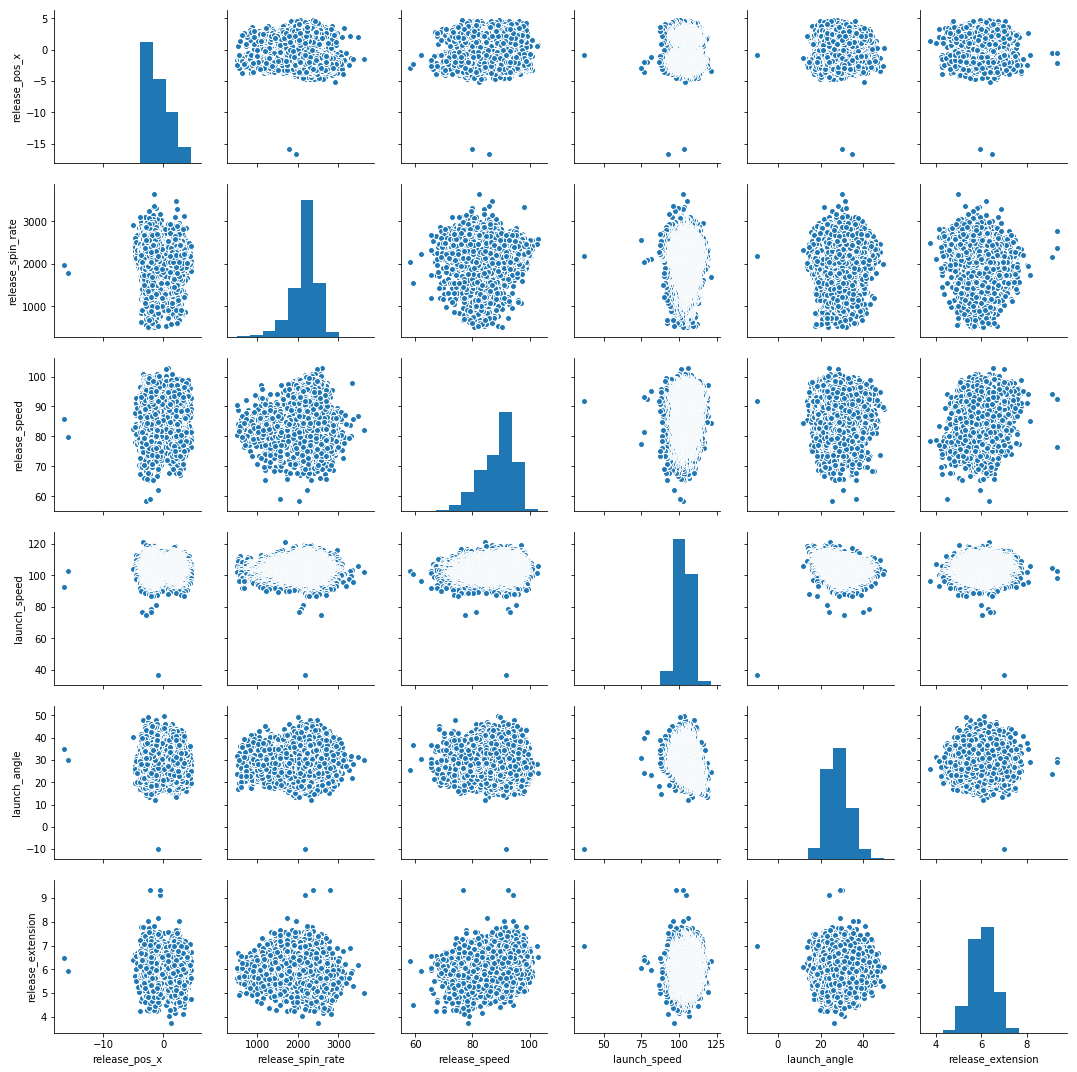

In [70]:
sns.pairplot(final_df[['pitch_type', 
                    'release_pos_x', 
                    'release_spin_rate', 
                    'release_speed', 
                    'launch_speed', 
                    'launch_angle',
                    'release_extension']])